In [2]:
import pandas as pd # for basic data handling- Import + understand + CLean + Manipulate the data
from sklearn.model_selection import train_test_split # To split the data
from sklearn.linear_model import LogisticRegression # Machine Learning  MOdule for Logistics Regression
from sklearn import metrics # For Performace MAtricess | Confusion Matrix |
                             # Accuracy + Precision + Sensitivity + Specificity +  AUC ROC Curve
                            # For any classification it is required to evaluate the model
import seaborn as sn # For Visualization
Risk_data = {'CreditScore': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'DC_ratio': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'default': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }


In [3]:
# Converting the previous Dictionary into a Table which is a dummy data
df = pd.DataFrame(Risk_data,columns= ['CreditScore', 'DC_ratio','work_experience','default'])
df.head(2)

,CreditScore,DC_ratio,work_experience,default
0,780,4.0,3,1
1,750,3.9,4,1


In [4]:
df.tail(1)

,CreditScore,DC_ratio,work_experience,default
39,690,3.7,5,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      40 non-null     int64  
 1   DC_ratio         40 non-null     float64
 2   work_experience  40 non-null     int64  
 3   default          40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [9]:
df['default'].value_counts()

default
1    21
0    19
Name: count, dtype: int64

In [11]:
cc = pd.read_csv(r"C:\Users\preet\Downloads\Customer_Churn (1).csv") 

In [14]:
X = df[['CreditScore', 'DC_ratio','work_experience']] # Set of independent Variables
y = df['default'] # dependent Variable
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

from sklearn.model_selection import train_test_split # To split the data
#_______________________________________________________________________________
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state= 1234)# random_state needs to have any integer
                                                                                          # like : set.seed() in R
print(X_train.shape) # 75% of 40
print(X_test.shape)  # 25% of 40
print(y_train.shape)
print(y_test.shape)

(30, 3)
(10, 3)
(30,)
(10,)


In [15]:
# here you are actually building the model, in this case study this
# LogisticRegression() function I am using
# below is more about a readily available ML based technique
# [Statistical Modeling - GLM()]

from sklearn.linear_model import LogisticRegression # Machine Learning  MOdule for Logistics Regression
#____________________________________________________________________________________________________________
logistic_regression= LogisticRegression()

In [16]:
# You are Building the Model
logistic_regression.fit(X= X_train,y = y_train)
# logistic_regression is your model name which got trained on X

LogisticRegression()

In [19]:
# Below you are going to compare the performance on training dataset
# because this is on the model was
pred_y_train = logistic_regression.predict(X_train)


pred_y_test =  logistic_regression.predict(X_test)
pred_y_test # Predicted 0 or 1 on test data [25%]
print(pred_y_train) # Predicted 0 or 1 on test data [75%]
print(y_train) # Actuall Y

[1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0]
0     1
7     1
3     1
10    0
6     0
2     1
34    1
29    1
27    0
18    0
35    0
9     0
25    1
5     1
16    0
36    0
22    0
33    1
28    1
37    0
32    1
11    1
30    0
26    1
23    0
15    0
24    0
12    1
38    0
19    0
Name: default, dtype: int64


In [20]:
cross=pd.crosstab(y_test,pred_y_test)

Accuracy:  1.0


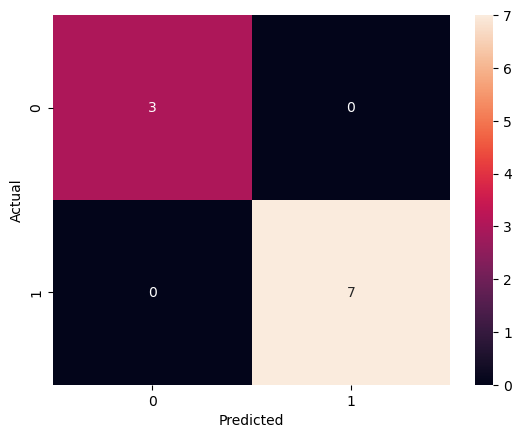

In [23]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_test, pred_y_test)
confusion
# Accuracy on test Data
confusion_matrix = pd.crosstab(y_test, pred_y_test, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, pred_y_test))